<b>Análise descritiva dos dados (EDA):</b>


A seguir as bibliotecas que serão utilizadas durante esse item do teste prático


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

1. Construa uma análise descritiva extraindo conhecimento das variáveis e apresentando quais insights podem ser obtidos a partir delas;
2. Mostre-nos um caminho para selecionar graficamente as variáveis mais ou menos importantes para cada problema, como elas se relacionam e porquê;
3. Em cada problema descreva quais outras técnicas poderiam ser aplicadas e porquê você não as escolheu;
4. Utilize os dados: eda_receitas_data.zip

In [2]:
receitas = pd.read_json("receitas.json")

In [3]:
receitas.head(5)

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
0,"[1. Place the stock, lentils, celery, carrot, ...",7.0,2006-09-01 04:00:00+00:00,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",426.0,None,30.0,2.500,"Lentil, Apple, and Turkey Wrap","[4 cups low-sodium vegetable or chicken stock,...",559.0
1,[Combine first 9 ingredients in heavy medium s...,23.0,2004-08-20 04:00:00+00:00,"[Food Processor, Onion, Pork, Bake, Bastille D...",403.0,This uses the same ingredients found in boudin...,18.0,4.375,Boudin Blanc Terrine with Red Onion Confit,"[1 1/2 cups whipping cream, 2 medium onions, c...",1439.0
2,[In a large heavy saucepan cook diced fennel a...,7.0,2004-08-20 04:00:00+00:00,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",165.0,None,6.0,3.750,Potato and Fennel Soup Hodge,"[1 fennel bulb (sometimes called anise), stalk...",165.0
3,[Heat oil in heavy large skillet over medium-h...,NaN,2009-03-27 04:00:00+00:00,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",NaN,The Sicilian-style tomato sauce has tons of Me...,NaN,5.000,Mahi-Mahi in Tomato Olive Sauce,"[2 tablespoons extra-virgin olive oil, 1 cup c...",NaN
4,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,32.0,2004-08-20 04:00:00+00:00,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",547.0,None,20.0,3.125,Spinach Noodle Casserole,"[1 12-ounce package frozen spinach soufflé, th...",452.0


Descrição de alguns valores estatísticos das variáveis numéricas

In [4]:
receitas.describe()

,fat,calories,protein,rating,sodium
count,1.590800e+04,1.597600e+04,15929.000000,20100.000000,1.597400e+04
mean,3.460975e+02,6.307857e+03,99.946199,3.713060,6.211474e+03
std,2.043102e+04,3.585851e+05,3835.616663,1.343144,3.328903e+05
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,7.000000e+00,1.980000e+02,3.000000,3.750000,8.000000e+01
50%,1.700000e+01,3.310000e+02,8.000000,4.375000,2.940000e+02
75%,3.300000e+01,5.860000e+02,27.000000,4.375000,7.110000e+02
max,1.722763e+06,3.011122e+07,236489.000000,5.000000,2.767511e+07


1. A partir dos dados é possível obter as seguintes filtragens:
    1. Variáveis descritivas:
        1. Filtrar receitas com limitações nos números de instruções (coluna: directions), permitindo encontrar receitas com determinada quantidade de instruções a serem realizadas;
        2. Filtrar receitas a partir de uma ou mais categorias desejadas (coluna: categories);
        3. Obter mais informações sobre uma receita através de sua descrição (coluna: desc);
        4. Buscar uma receita pelo seu título ou algum elemento presente em seu título (coluna: title);
        5. Filtrar receitas com limitações nos ingredientes (coluna: ingredients), podendo ser limitado ao número de ingredientes ou aos ingredientes que são utilizados na receita;
    2. Variáveis numéricas:
        1. Filtrar as receitas através de um limiar de gordura (coluna: fat), podendo ser uma faixa de valores desejados ou as receitas com maiores ou menores quantidades de gordura;
        2. Filtrar receitas de acordo com a data que foram inseridas na base (coluna: date), podendo buscar receitas mais "clássicas" ou mais "modernas";
        3. Filtar as receitas através de um limiar de calorias (coluna: calories), podendo ser uma faixa de valores desejados ou as receitas com maiores ou menores quantidades de calorias;
        4. Filtar as receitas através de um limiar de proteinas (coluna: protein), podendo ser uma faixa de valores desejados ou as receitas com maiores ou menores quantidades de proteinas;
        5. Filtar as receitas através de um limiar da avaliação da receita (coluna: rating), podendo ser uma faixa de valores desejados ou as receitas com maiores ou menores avaliação;
        6. Filtar as receitas através de um limiar de sódio (coluna: sodium), podendo ser uma faixa de valores desejados ou as receitas com maiores ou menores quantidades de sódio;

2. Para cada filtragem basta escolher a variável desejada e como vai desejar filtrar a mesma

In [5]:
def atributos_numericos(colunas, receitas, coluna, separador=None):
    receitas_filtro = []
    filtro = str(input("Digite qual o número mínimo e máximo do atributo desejado separado por espaços em braco?\nExemplo de entrada: 5 10, com no mínimo 5 e no máximo 10\n")).split(" ")
    filtro[0] = int(filtro[0])
    filtro[1] = int(filtro[1])   
    for i in range(receitas.shape[0]):
        try:
            if(separador == None):
                if(filtro[0]<=receitas[colunas[coluna-1]][i]<=filtro[1]):
                    receitas_filtro.append(receitas.iloc[i])
            elif(separador == "-"):
                if(filtro[0]<=int(str(receitas[colunas[coluna-1]][i].date()).split(separador)[0])<=filtro[1]):
                    receitas_filtro.append(receitas.iloc[i])
            else:
                if(filtro[0]<=len(str(receitas[colunas[coluna-1]][i]).split(separador))<=filtro[1]):
                    receitas_filtro.append(receitas.iloc[i])
        except:
            continue

    return receitas_filtro

def atributos_descritivos(colunas, receitas, coluna):
    receitas_filtro = []
    if(coluna == 1):
            receitas_filtro = atributos_numericos(colunas,receitas,coluna,".")
    else:    
        filtro = str(input("Digite o termo pelos quais você deseja filtrar separados por ponto e vírgula\nExemplo de entrada: Sandwich;Fruit\n")).split(";")
        for i in range(receitas.shape[0]):
            flag = True
            for j in filtro:
                try:
                    if not ((j in receitas[colunas[coluna-1]][i]) or ((j in receitas[colunas[coluna-1]][i][0]))):
                        flag = False
                        break
                except:
                    flag = False
                    break
            if flag:
                receitas_filtro.append(receitas.iloc[i])
    return receitas_filtro

def insights(receitas):
    receitas_filtro = []
    try:
        coluna = int(input("1. Instruções; 2. Categorias; 3. Descrição; 4. Título; 5. Ingredientes;\n 6. Gordura; 7. Data; 8. Calorias; 9. Proteínas; 10. Avaliação; 11. Sódio\n"))
        colunas = ["directions","categories","desc","title","ingredients","fat","date","calories","protein","rating","sodium"]
        filtro = ""
        if(coluna < 5):
            receitas_filtro = atributos_descritivos(colunas,receitas,coluna) 
        elif(coluna == 5):
            tipo = int(input("Qual tipo de filtragem deseja realizar?\n1 - Quantidade de ingredientes; 2 - Lista de ingredientes\n"))
            if(tipo == 1):
                receitas_filtro = atributos_numericos(colunas,receitas,coluna,",")
            elif(tipo == 2):
                receitas_filtro = atributos_descritivos(colunas, receitas, coluna)
        elif(5 < coluna < 12):
            if(coluna == 7):
                receitas_filtro = atributos_numericos(colunas, receitas, coluna, "-")
            else:
                receitas_filtro = atributos_numericos(colunas,receitas,coluna)
        else:
            raise "error"
    except:
        print("O valor informado não é válido")
    return receitas_filtro

O código a seguir retorna um vetor com as receitas a partir dos insights desejados informados anteriormente, isto é, utilizado de quaisquer técnica de filtragem desejada para gerar o resultado desejado

In [6]:
insights_receitas = insights(receitas)

Para selecionar gráficamente os dados, utilizaremos de uma matriz de correlação, indicando a correlação entre cada coluna, o problema da matriz de correlação é que a mesma apenas gera a correlação entre atributos numéricos. É possível contornar esse problema através de transformações de atributos numéricos para categóricos (utilizando por exemplo o one-hot), contudo ao fazer essa mudança poderiamos gerar o que é conhecido como Maldição da Dimensionalidade, pois cada instrução única do atributo (directions) seria transformado em uma coluna, bem como cada descrição única e cada valor do atributo ingredients também gerariam novas colunas. Sendo assim uma solução temporária para ainda utilizar as informações dessas duas colunas seria a de transformar as variáveis categóricas em variáveis numéricas a partir da função lambda x: x = len(x). Onde o len(x) iria se referir ao número de ingredientes ou ao número de instruções. A seguir teremos 2 matrizes de correlação a primeira sem considerar esse preprocessamento dos dados, e a segunda considerando o mesmo.

<b>Sem preprocessamento</b>

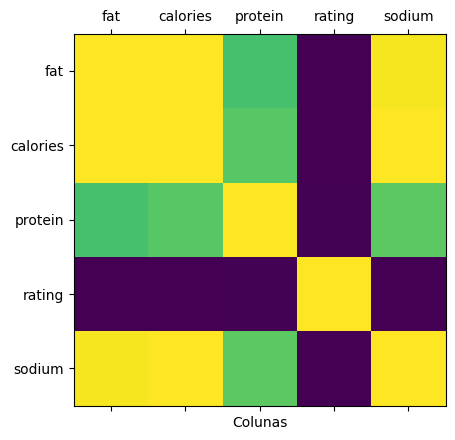

,fat,calories,protein,rating,sodium
fat,1.000000,0.996538,0.712194,0.007235,0.986476
calories,0.996538,1.000000,0.742816,0.007882,0.996392
protein,0.712194,0.742816,1.000000,0.013972,0.749287
rating,0.007235,0.007882,0.013972,1.000000,0.008179
sodium,0.986476,0.996392,0.749287,0.008179,1.000000


In [7]:
colunas_numericas = receitas.select_dtypes(['number']).columns
ticks = [i for i in range(len(colunas_numericas))]
plt.matshow(receitas.corr())
plt.xlabel("Colunas")
plt.xticks(ticks,colunas_numericas)
plt.yticks(ticks,colunas_numericas)
plt.show()
corr = receitas.corr()
corr.style.background_gradient(cmap='coolwarm')

<b>Com preprocessamento</b>

In [8]:
colunas_descritivas = receitas.select_dtypes(exclude=['int','float']).columns
colunas_descritivas

Index(['directions', 'date', 'categories', 'desc', 'title', 'ingredients'], dtype='object')

As colunas que serão transformadas em atributos numéricos serão: directions, categories e ingredients.

In [9]:
receitas_posprocessada = receitas.copy()
separador = [".",",",","]
colunas_processar = ['directions', 'categories', 'ingredients']
novas_colunas = ['len_directions','len_categories','len_ingredients']
for col in range(len(novas_colunas)):
    nova_coluna = []
    for i in range(receitas.shape[0]):
        nova_coluna.append(len(str(receitas[colunas_processar[col]][i]).split(separador[col])))
    receitas_posprocessada[novas_colunas[col]] = nova_coluna

receitas_posprocessada.head(5)

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium,len_directions,len_categories,len_ingredients
0,"[1. Place the stock, lentils, celery, carrot, ...",7.0,2006-09-01 04:00:00+00:00,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",426.0,None,30.0,2.500,"Lentil, Apple, and Turkey Wrap","[4 cups low-sodium vegetable or chicken stock,...",559.0,16,11,24
1,[Combine first 9 ingredients in heavy medium s...,23.0,2004-08-20 04:00:00+00:00,"[Food Processor, Onion, Pork, Bake, Bastille D...",403.0,This uses the same ingredients found in boudin...,18.0,4.375,Boudin Blanc Terrine with Red Onion Confit,"[1 1/2 cups whipping cream, 2 medium onions, c...",1439.0,39,11,38
2,[In a large heavy saucepan cook diced fennel a...,7.0,2004-08-20 04:00:00+00:00,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",165.0,None,6.0,3.750,Potato and Fennel Soup Hodge,"[1 fennel bulb (sometimes called anise), stalk...",165.0,7,7,10
3,[Heat oil in heavy large skillet over medium-h...,NaN,2009-03-27 04:00:00+00:00,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",NaN,The Sicilian-style tomato sauce has tons of Me...,NaN,5.000,Mahi-Mahi in Tomato Olive Sauce,"[2 tablespoons extra-virgin olive oil, 1 cup c...",NaN,15,17,16
4,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,32.0,2004-08-20 04:00:00+00:00,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",547.0,None,20.0,3.125,Spinach Noodle Casserole,"[1 12-ounce package frozen spinach soufflé, th...",452.0,8,11,8


Agora com as colunas já processadas, vamos ver a matriz de covariância

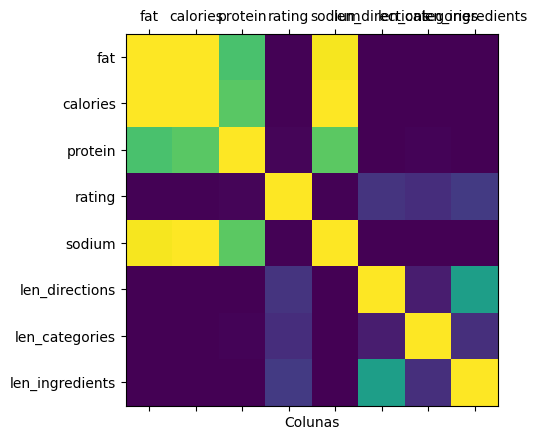

,fat,calories,protein,rating,sodium,len_directions,len_categories,len_ingredients
fat,1.000000,0.996538,0.712194,0.007235,0.986476,0.002306,0.004511,0.003428
calories,0.996538,1.000000,0.742816,0.007882,0.996392,0.001995,0.004535,0.003440
protein,0.712194,0.742816,1.000000,0.013972,0.749287,0.001689,0.009500,0.003782
rating,0.007235,0.007882,0.013972,1.000000,0.008179,0.152886,0.133052,0.170460
sodium,0.986476,0.996392,0.749287,0.008179,1.000000,0.001879,0.003885,0.004024
len_directions,0.002306,0.001995,0.001689,0.152886,0.001879,1.000000,0.083556,0.562703
len_categories,0.004511,0.004535,0.009500,0.133052,0.003885,0.083556,1.000000,0.135078
len_ingredients,0.003428,0.003440,0.003782,0.170460,0.004024,0.562703,0.135078,1.000000


In [10]:
colunas_numericas = receitas_posprocessada.select_dtypes(['number']).columns
ticks = [i for i in range(len(colunas_numericas))]
plt.matshow(receitas_posprocessada.corr())
plt.xlabel("Colunas")
plt.xticks(ticks,colunas_numericas)
plt.yticks(ticks,colunas_numericas)
plt.show()
corr = receitas_posprocessada.corr()
corr.style.background_gradient(cmap='coolwarm')

Poderiam ser utilizadas outras técnicas como algoritmos de agrupamento e árvores de decisão, para poder encontrar padrões entre os objetos, contudo o conjunto de dados de entrada não possui classificação. Contudo poderiam ser adaptados, utilizado um algoritmo como o apresentado anteriormente para filtrar as receitas a partir de um atributo desejado. Optei por não empregas as mesmas pois acredito que matriz de covariâncias e mapas de calor são mais fáceis de interpretar por usuários com menor conhecimento teôrico de técnicas de Machine Learning.

Além disso, a base não foi pre-processada para lidar com atributos numéricos com valores NaN (esse tipo de preprocessamento não é viável para atributos descritivos devido ao contexto da base explicado anteriormente). Segue código e nova representação gráfica da base após o pre-processamento desses valores.

<b>Pre-processamento de atributos NaN</b>

In [11]:
receitas_sem_NaN = receitas.copy()
colunas_numericas = receitas_sem_NaN.select_dtypes(["number"]).columns
for col in colunas_numericas:
    receitas_sem_NaN[col].fillna(value=receitas_sem_NaN[col].mean(), inplace=True)
receitas_sem_NaN.head(5)

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
0,"[1. Place the stock, lentils, celery, carrot, ...",7.000000,2006-09-01 04:00:00+00:00,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",426.000000,None,30.000000,2.500,"Lentil, Apple, and Turkey Wrap","[4 cups low-sodium vegetable or chicken stock,...",559.000000
1,[Combine first 9 ingredients in heavy medium s...,23.000000,2004-08-20 04:00:00+00:00,"[Food Processor, Onion, Pork, Bake, Bastille D...",403.000000,This uses the same ingredients found in boudin...,18.000000,4.375,Boudin Blanc Terrine with Red Onion Confit,"[1 1/2 cups whipping cream, 2 medium onions, c...",1439.000000
2,[In a large heavy saucepan cook diced fennel a...,7.000000,2004-08-20 04:00:00+00:00,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",165.000000,None,6.000000,3.750,Potato and Fennel Soup Hodge,"[1 fennel bulb (sometimes called anise), stalk...",165.000000
3,[Heat oil in heavy large skillet over medium-h...,346.097498,2009-03-27 04:00:00+00:00,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",6307.856848,The Sicilian-style tomato sauce has tons of Me...,99.946199,5.000,Mahi-Mahi in Tomato Olive Sauce,"[2 tablespoons extra-virgin olive oil, 1 cup c...",6211.473832
4,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,32.000000,2004-08-20 04:00:00+00:00,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",547.000000,None,20.000000,3.125,Spinach Noodle Casserole,"[1 12-ounce package frozen spinach soufflé, th...",452.000000


Matriz de Covarância e mapa de calor da base pósprocessada

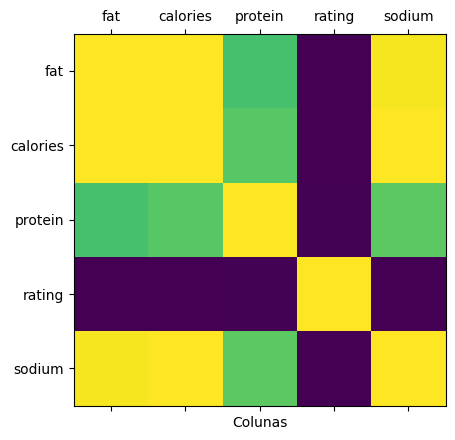

,fat,calories,protein,rating,sodium
fat,1.000000,0.996537,0.712194,0.006173,0.986476
calories,0.996537,1.000000,0.742816,0.006793,0.996392
protein,0.712194,0.742816,1.000000,0.011961,0.749287
rating,0.006173,0.006793,0.011961,1.000000,0.007049
sodium,0.986476,0.996392,0.749287,0.007049,1.000000


In [12]:
colunas_numericas = receitas_sem_NaN.select_dtypes(['number']).columns
ticks = [i for i in range(len(colunas_numericas))]
plt.matshow(receitas_sem_NaN.corr())
plt.xlabel("Colunas")
plt.xticks(ticks,colunas_numericas)
plt.yticks(ticks,colunas_numericas)
plt.show()
corr = receitas_sem_NaN.corr()
corr.style.background_gradient(cmap='coolwarm')

Visando apresentar outros insights, serão apresentados 3 tipos de gráficos para cada atributo numérico:

1. Scatterplots no formato atributo x atributo;
2. Boxplots;
3. Histogramas;

<b> Scatterplot </b>

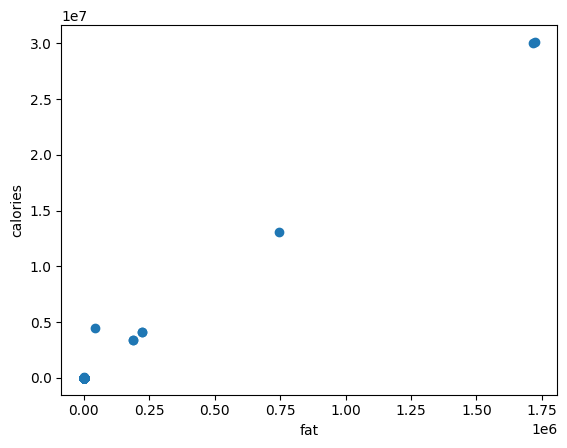

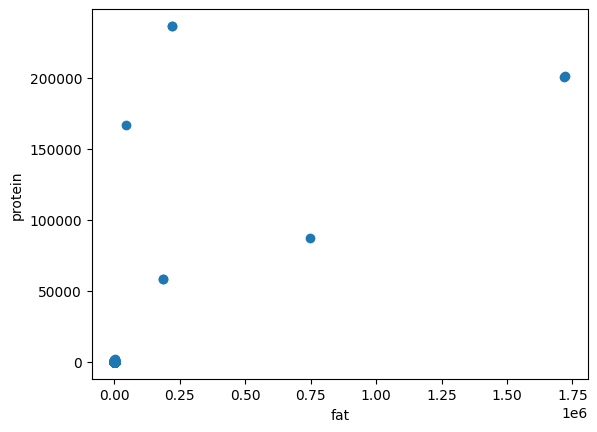

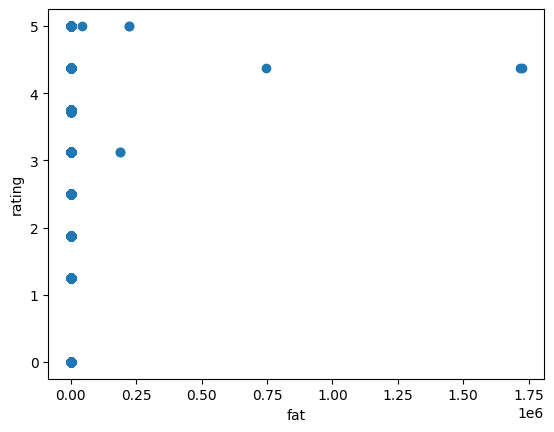

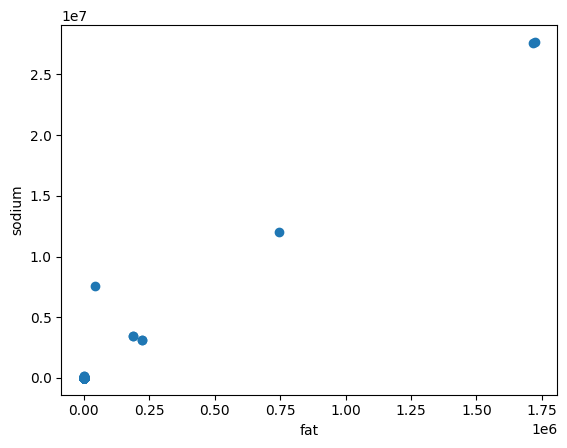

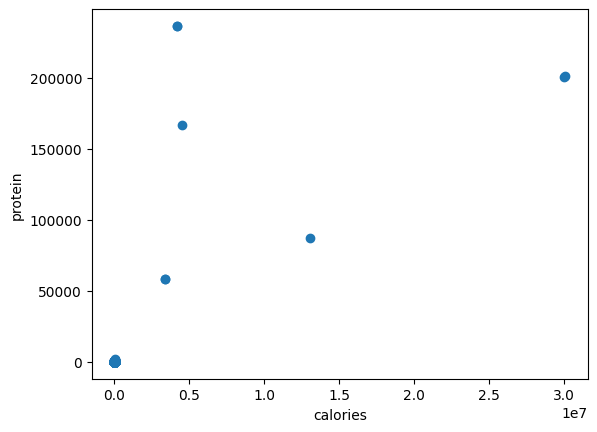

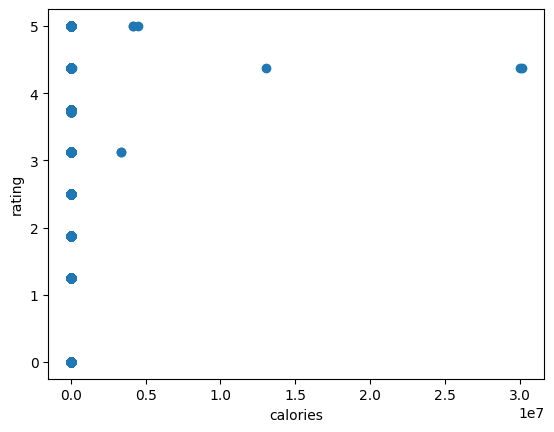

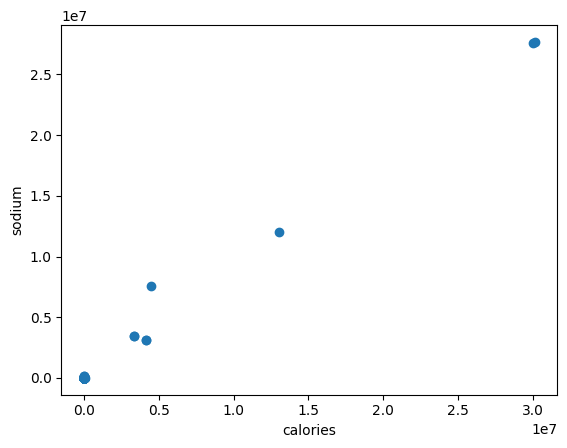

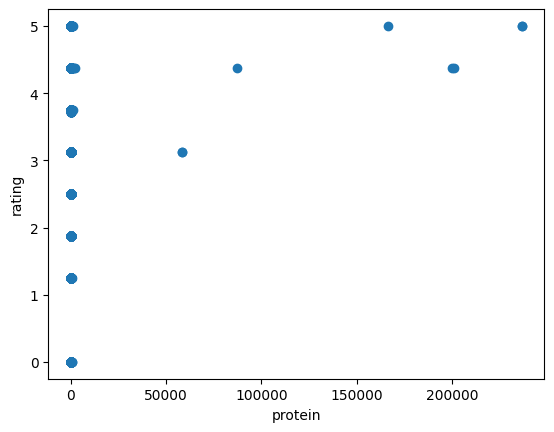

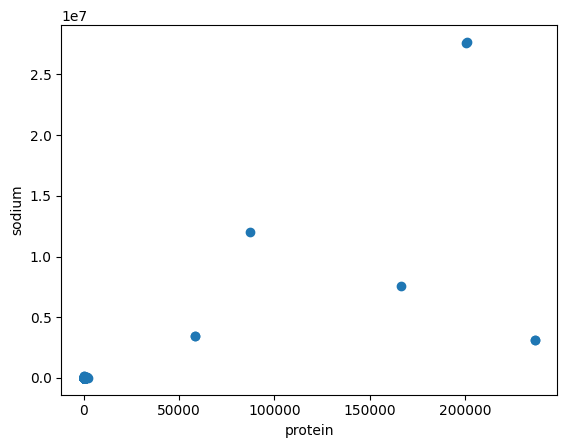

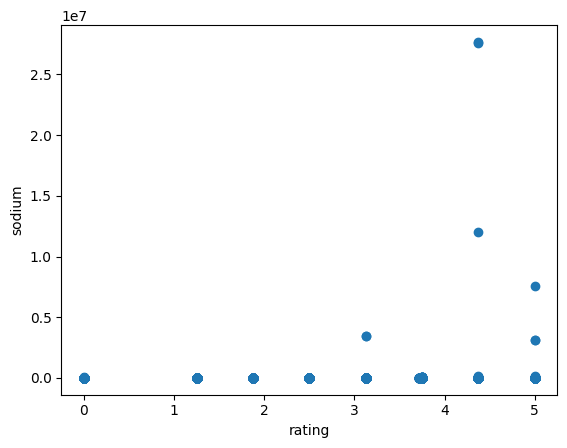

In [14]:
colunas_numericas = receitas_sem_NaN.select_dtypes(['number']).columns
for i in range(len(colunas_numericas)):
    for j in range(i+1,len(colunas_numericas)):
        plt.scatter(receitas_sem_NaN[colunas_numericas[i]],receitas_sem_NaN[colunas_numericas[j]])
        plt.xlabel(colunas_numericas[i])
        plt.ylabel(colunas_numericas[j])
        plt.show()

<b> Boxplots </b> (considerando outliers)

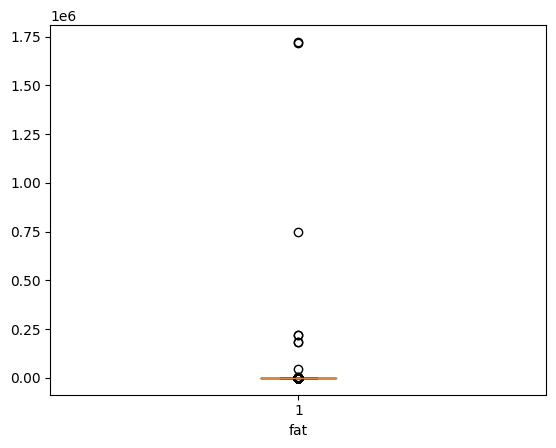

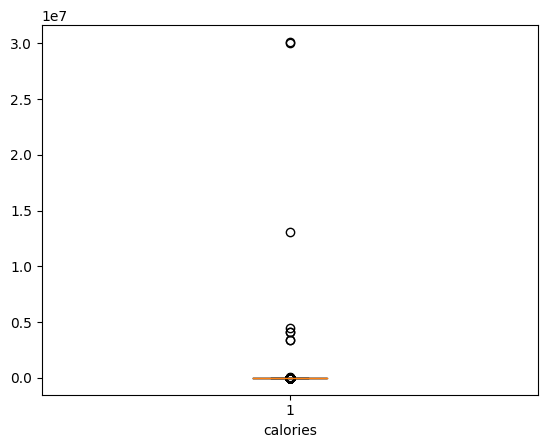

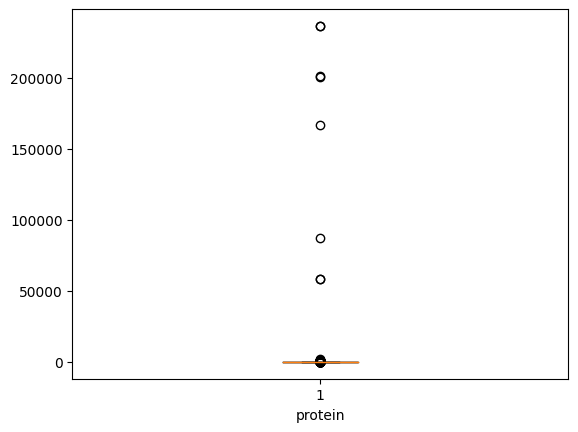

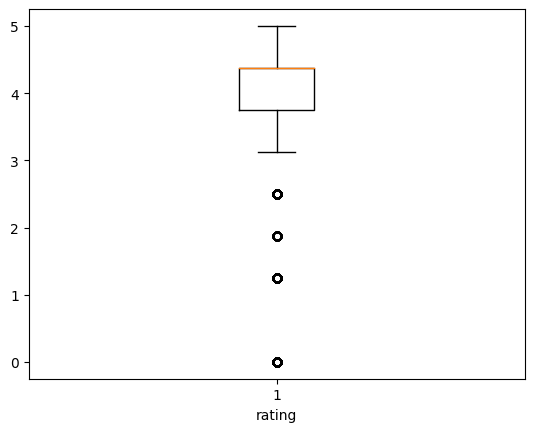

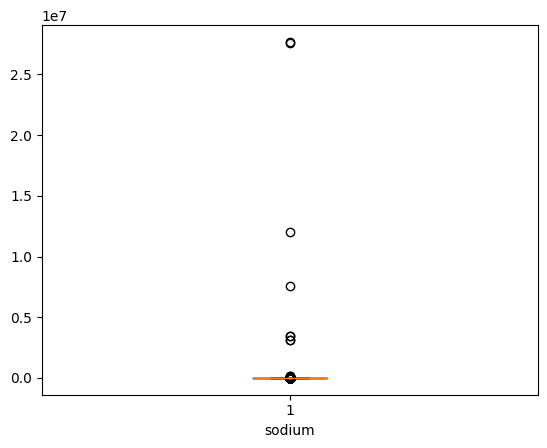

In [16]:
colunas_numericas = receitas_sem_NaN.select_dtypes(['number']).columns
for col in colunas_numericas:
    plt.boxplot(receitas_sem_NaN[col])
    plt.xlabel(col)
    plt.show()

<b> Boxplot </b> (sem outliers)

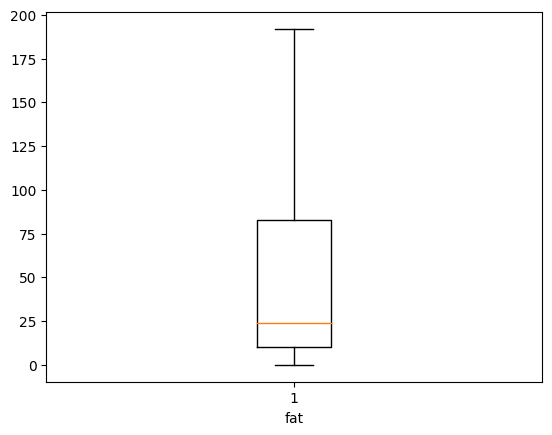

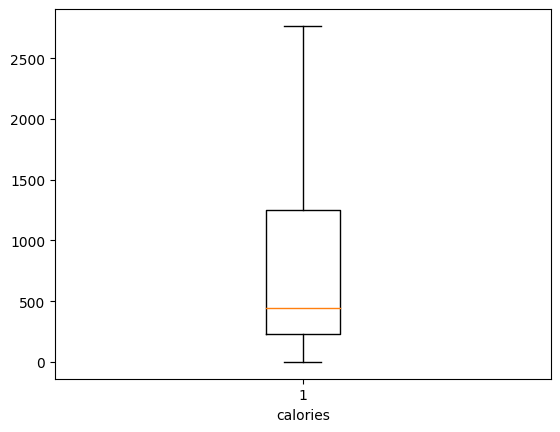

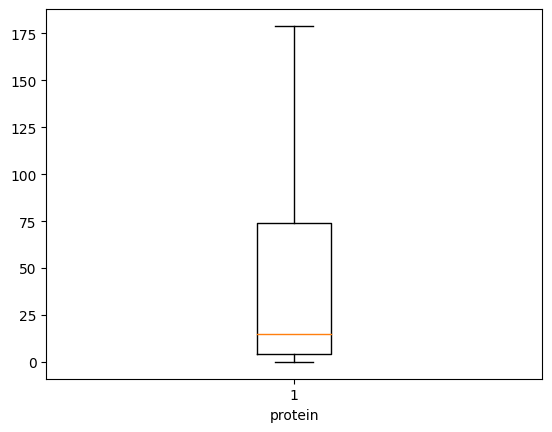

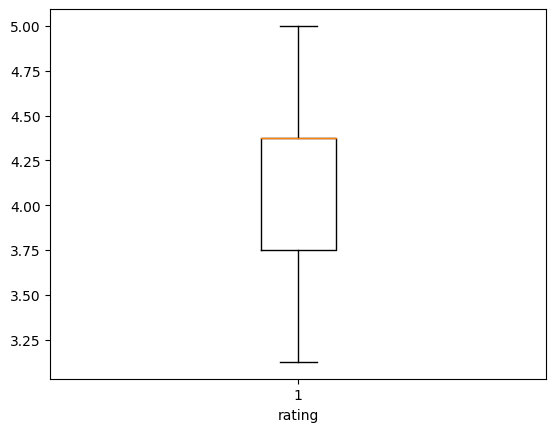

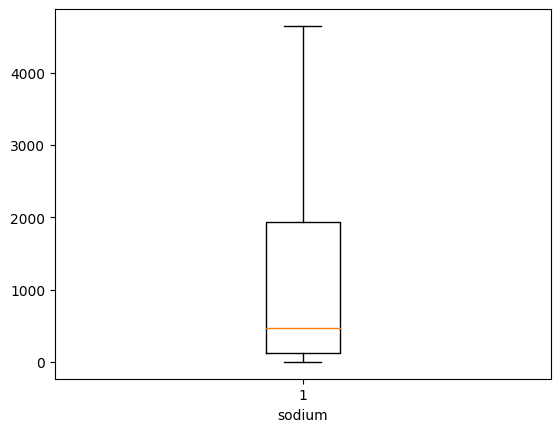

In [23]:
colunas_numericas = receitas_sem_NaN.select_dtypes(['number']).columns
for col in colunas_numericas:
    plt.boxplot(receitas_sem_NaN[col],showfliers=False)
    plt.xlabel(col)
    plt.show()

<b> Histogramas </b>

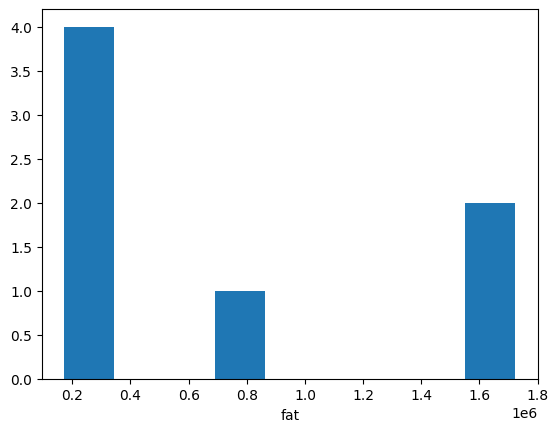

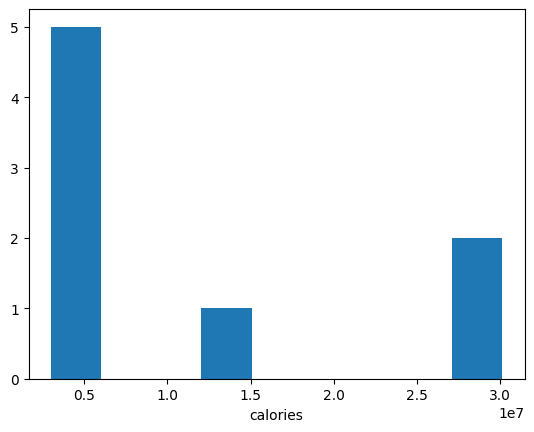

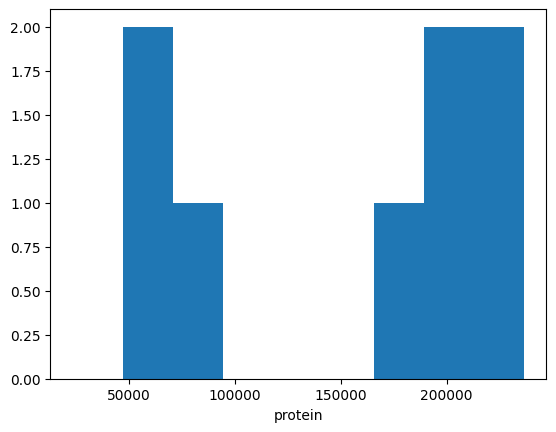

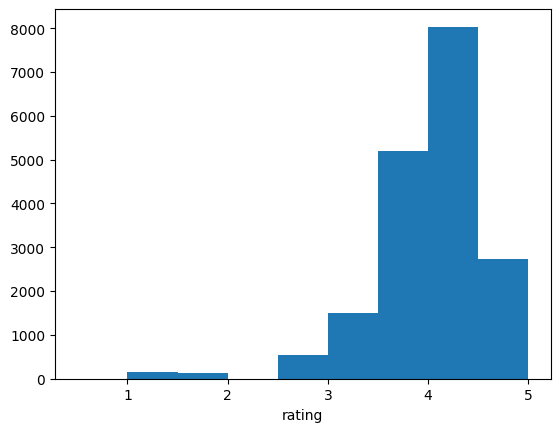

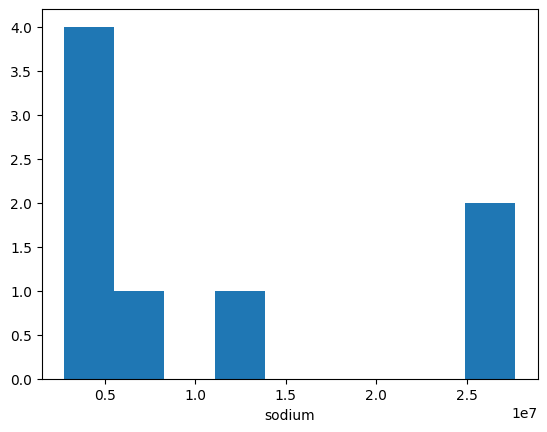

In [26]:
colunas_numericas = receitas_sem_NaN.select_dtypes(['number']).columns
for col in colunas_numericas:
    maximo = max(receitas_sem_NaN[col])
    minimo = min(receitas_sem_NaN[col])
    bins = []
    for i in range(1,11):
        bins.append(minimo+((maximo-minimo)/10)*i)
    plt.hist(receitas_sem_NaN[col], bins = bins)
    plt.xlabel(col)
    plt.show()

Com isso o usuário pode passar a escolher os dados a partir de representações gráficas que representam de maneira mais adequada o que o mesmo deseja inferir, por exemplo a partir de uma distribuição de dados mais uniforme. Podendo ver variáveis com correlações interessantes e aproveitar dessas correlações para inferir novas métricas a serem analizadas. 